In [4]:
# Import necessary libraries

! pip install pycaret full 
import pycaret
! pip install pandas
from pycaret.regression import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import dataset & choosing desired parameters to analyze
df = pd.read_csv("Database - Copy.csv")
df = df[['Micro Pollutant', 'MP Category', 'Initial Concentration of MP (mg/L)', 'Compound MW (g/mol)', 'Compound Charge', 'Initial FS pH', 'Initial DS pH','Type of MB', 'MB Contact Angle (°)', 'MB Zeta Potential (mV)', 'Draw Solution', 'DS MW (g mol-1)', 'DS Concentration (M)', 'Operating Time (h)', 'Cross Flow Velocity (cm/s)','Water Flux, Jw (LMH)','Reverse Salt Flux, Js (gMH)','Temperature (⁰C)', 'Removal Rate (%)']]
df

,Micro Pollutant,MP Category,Initial Concentration of MP (mg/L),Compound MW (g/mol),Compound Charge,Initial FS pH,Initial DS pH,Type of MB,MB Contact Angle (°),MB Zeta Potential (mV),Draw Solution,DS MW (g mol-1),DS Concentration (M),Operating Time (h),Cross Flow Velocity (cm/s),"Water Flux, Jw (LMH)","Reverse Salt Flux, Js (gMH)",Temperature (⁰C),Removal Rate (%)
0,Atenolol,β-Blockers,0.01000,266.34,1,7.05,NaN,HTI CTA FO,79.5,-6.87,Monoammonium phosphate (MAP),115.00,1.0,10.0,8.5,7.7,0.08,20.0,80
1,Atrazine,Herbicide,0.01000,216.00,0,7.05,NaN,HTI CTA FO,79.5,-6.87,Monoammonium phosphate (MAP),115.00,1.0,10.0,8.5,7.7,0.08,20.0,77
2,Primidone,Anticonvulsant,0.01000,218.00,0,7.05,NaN,HTI CTA FO,79.5,-6.87,Monoammonium phosphate (MAP),115.00,1.0,10.0,8.5,7.7,0.08,20.0,90
3,Caffeine,Stimulant,0.01000,194.00,0,7.05,NaN,HTI CTA FO,79.5,-6.87,Monoammonium phosphate (MAP),115.00,1.0,10.0,8.5,7.7,0.08,20.0,81
4,Atenolol,β-Blockers,0.01000,266.34,1,7.05,NaN,HTI CTA FO,79.5,-6.87,Monoammonium phosphate (MAP),115.00,2.0,10.0,8.5,9.5,0.08,20.0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Sulfamethoxazole,Antibiotics,0.01220,253.28,-1,7.00,NaN,Aquaporin FO,26.4,NaN,NaCl,58.44,0.7,2.5,17.5,10.0,2.00,20.0,100
217,Trimethoprim,Antibiotics,0.01070,290.32,1,7.00,NaN,Aquaporin FO,26.4,NaN,NaCl,58.44,0.7,2.5,17.5,10.0,2.00,20.0,99
218,Carbamazepine,Anticonvulsant,0.01370,236.27,0,7.00,NaN,Aquaporin FO,26.4,NaN,NaCl,58.44,0.7,2.5,17.5,10.0,2.00,20.0,100
219,Ibuprofen,Nonsteroidal anti-inflammatory,0.01220,206.29,-1,7.00,NaN,Aquaporin FO,26.4,NaN,NaCl,58.44,0.7,2.5,17.5,10.0,2.00,20.0,100


In [7]:
# Setting up the model by choosing water flux (Jw) as the prediction target

setup(data = df,target = 'Reverse Salt Flux, Js (gMH)',session_id = 123)

,Description,Value
0,Session id,123
1,Target,"Reverse Salt Flux, Js (gMH)"
2,Target type,Regression
3,Original data shape,"(221, 17)"
4,Transformed data shape,"(221, 46)"
5,Transformed train set shape,"(154, 46)"
6,Transformed test set shape,"(67, 46)"
7,Numeric features,12
8,Categorical features,4
9,Rows with missing values,7.2%


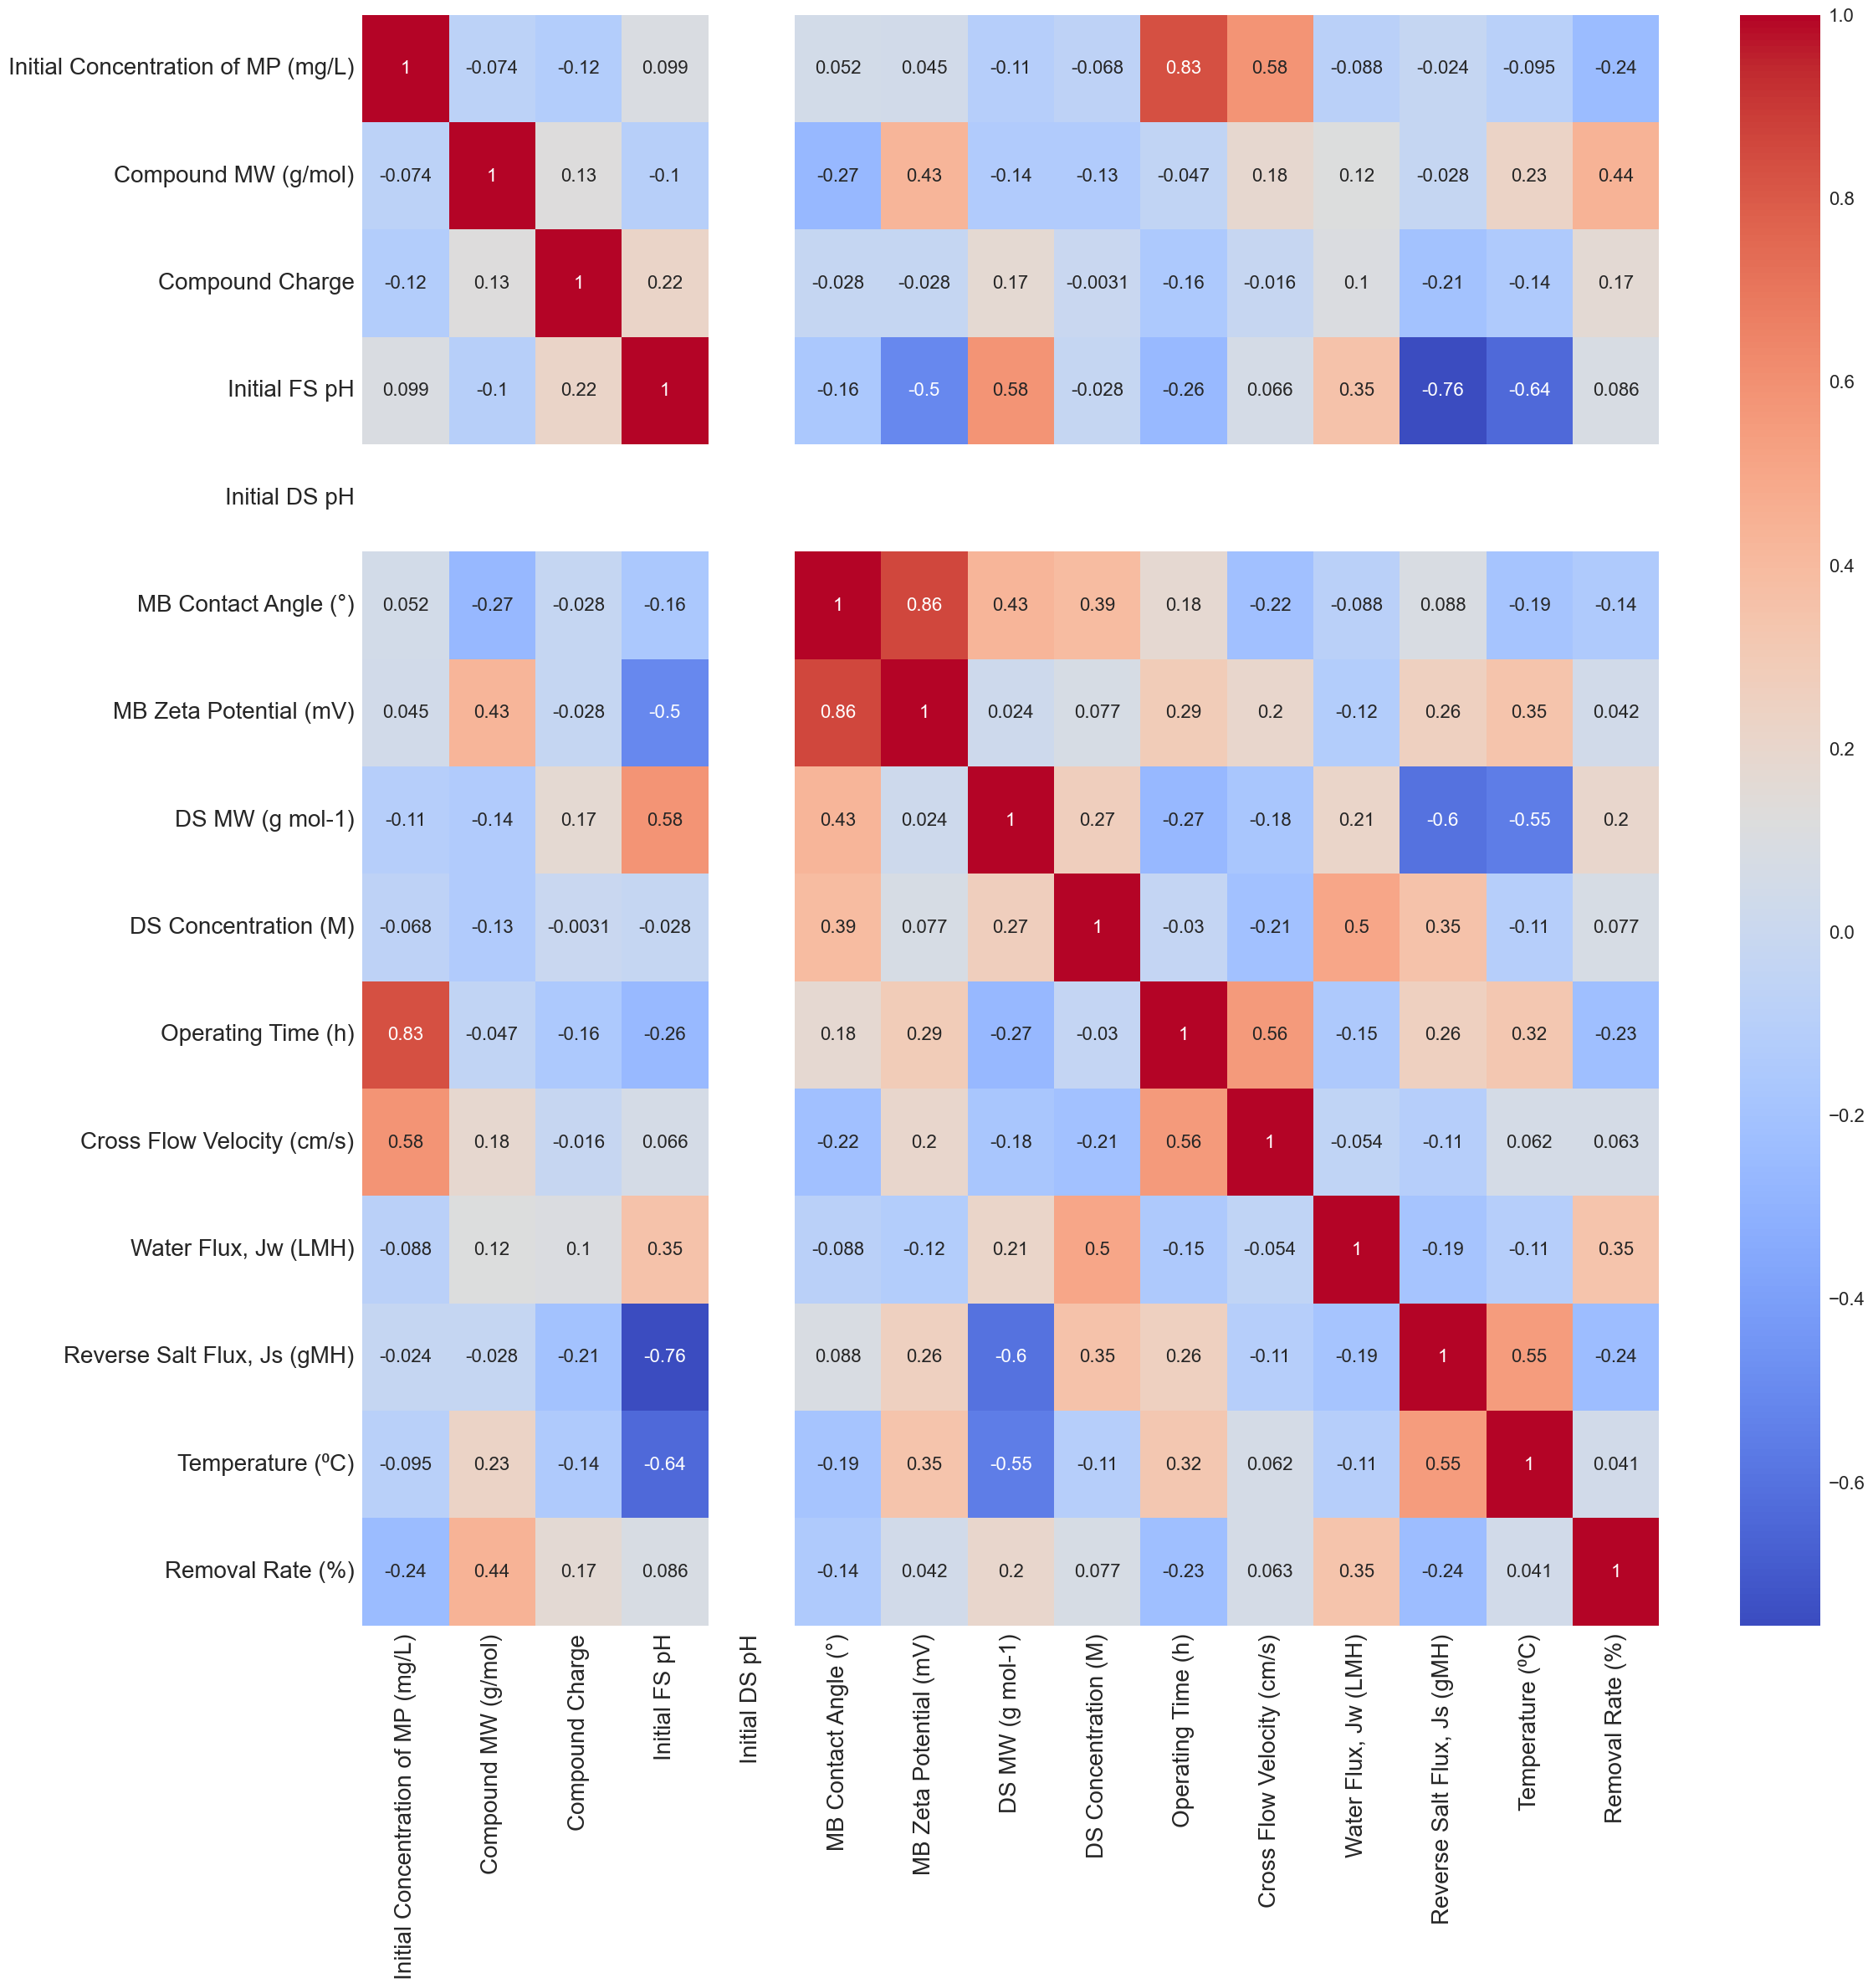

In [4]:
# Plotting correlation between parameters in dataset

plt.figure(figsize=(25,25))
my_correlation = df.corr()
sns.heatmap(my_correlation,annot=True, cmap='coolwarm',annot_kws={"size": 16})
ax = plt.gca()
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=360)
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=16)


In [6]:
# Refining the dataset removing inputs with very hitg correlation

df = df[['Micro Pollutant', 'MP Category', 'Initial Concentration of MP (mg/L)', 'Compound MW (g/mol)', 'Compound Charge', 'Initial FS pH','Type of MB', 'MB Contact Angle (°)', 'Draw Solution', 'DS MW (g mol-1)', 'DS Concentration (M)', 'Operating Time (h)', 'Cross Flow Velocity (cm/s)','Water Flux, Jw (LMH)','Reverse Salt Flux, Js (gMH)','Temperature (⁰C)', 'Removal Rate (%)']]



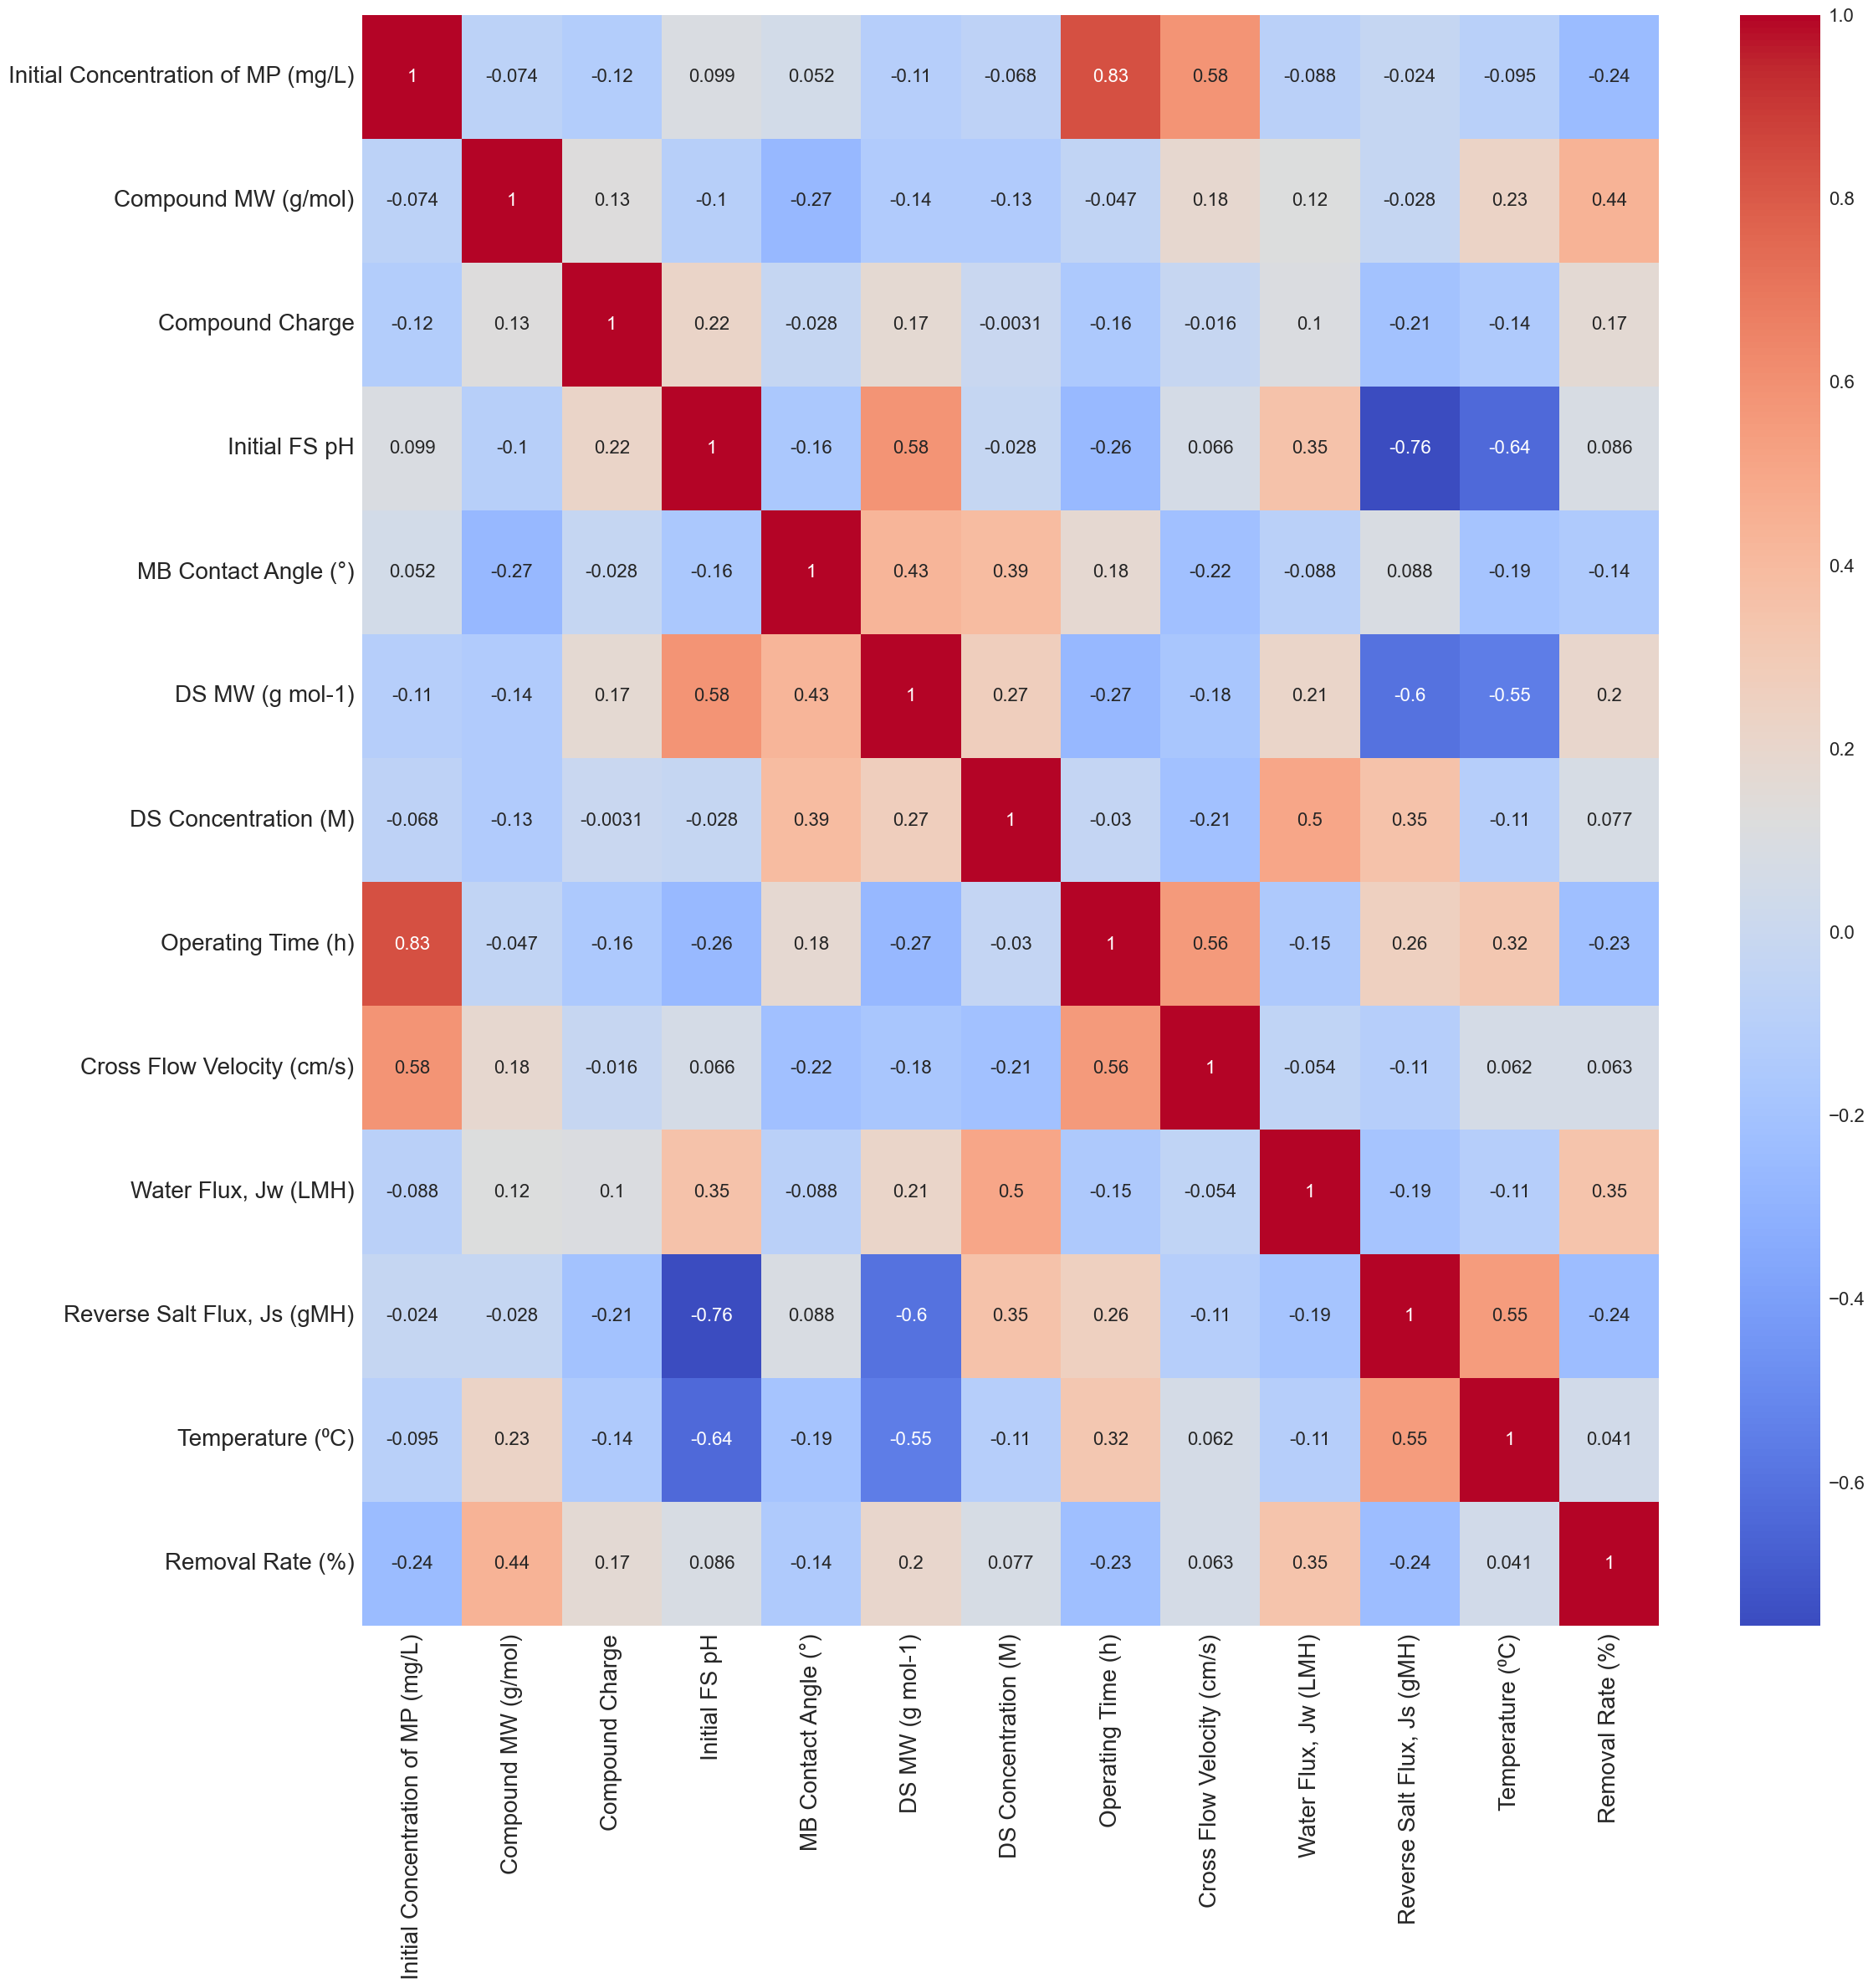

In [6]:
plt.figure(figsize=(25,25))
my_correlation = df.corr()
sns.heatmap(my_correlation,annot=True, cmap='coolwarm',annot_kws={"size": 16})
ax = plt.gca()
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=360)
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=16)

In [22]:
# Auto ML using PyCaret with all regression models available

best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0044,0.0002,0.0120,1.0000,0.0070,0.0092,0.4080
dt,Decision Tree Regressor,0.0081,0.0021,0.0247,0.9997,0.0113,0.0128,0.3220
xgboost,Extreme Gradient Boosting,0.0157,0.0022,0.0391,0.9997,0.0211,0.0425,0.3560
gbr,Gradient Boosting Regressor,0.0375,0.0044,0.0623,0.9994,0.0284,0.0815,0.3450
rf,Random Forest Regressor,0.0577,0.0143,0.1123,0.9980,0.0458,0.0933,0.3410
lightgbm,Light Gradient Boosting Machine,0.1016,0.0195,0.1335,0.9973,0.0713,0.2581,0.5120
br,Bayesian Ridge,0.5060,0.4606,0.6679,0.9306,0.2528,1.5698,0.3170
lr,Linear Regression,0.4940,0.4680,0.6757,0.9301,0.2640,1.6233,0.9610
ridge,Ridge Regression,0.5405,0.4848,0.6860,0.9264,0.2547,1.5673,0.3170
ada,AdaBoost Regressor,0.3981,0.7989,0.6847,0.8910,0.1640,0.3901,0.3280


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [7]:
 # Creating the ML model based on best models compared above: Extra Trees Regressor
et=create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0044,0.0001,0.0107,1.0000,0.0073,0.0097
1,0.0031,0.0001,0.0102,1.0000,0.0054,0.0037
2,0.0050,0.0002,0.0135,1.0000,0.0065,0.0085
3,0.0014,0.0000,0.0039,1.0000,0.0022,0.0032
4,0.0014,0.0000,0.0033,1.0000,0.0014,0.0014
5,0.0052,0.0001,0.0110,1.0000,0.0045,0.0092
6,0.0036,0.0001,0.0098,1.0000,0.0059,0.0170
7,0.0095,0.0007,0.0260,0.9998,0.0163,0.0191
8,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
et = tune_model(et, choose_better = True, n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0226,0.0064,0.0799,0.9985,0.0565,0.0819
1,0.0694,0.0280,0.1674,0.9966,0.0462,0.0394
2,0.0768,0.0463,0.2151,0.9955,0.0737,0.1199
3,0.0268,0.0042,0.0648,0.9995,0.0268,0.0662
4,0.0185,0.0035,0.0588,0.9996,0.0307,0.0376
5,0.0543,0.0077,0.0879,0.9991,0.0453,0.1109
6,0.0313,0.0043,0.0653,0.9995,0.0384,0.0676
7,0.0409,0.0072,0.0848,0.9981,0.0493,0.0623
8,0.0001,0.0000,0.0002,1.0000,0.0002,0.0007


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


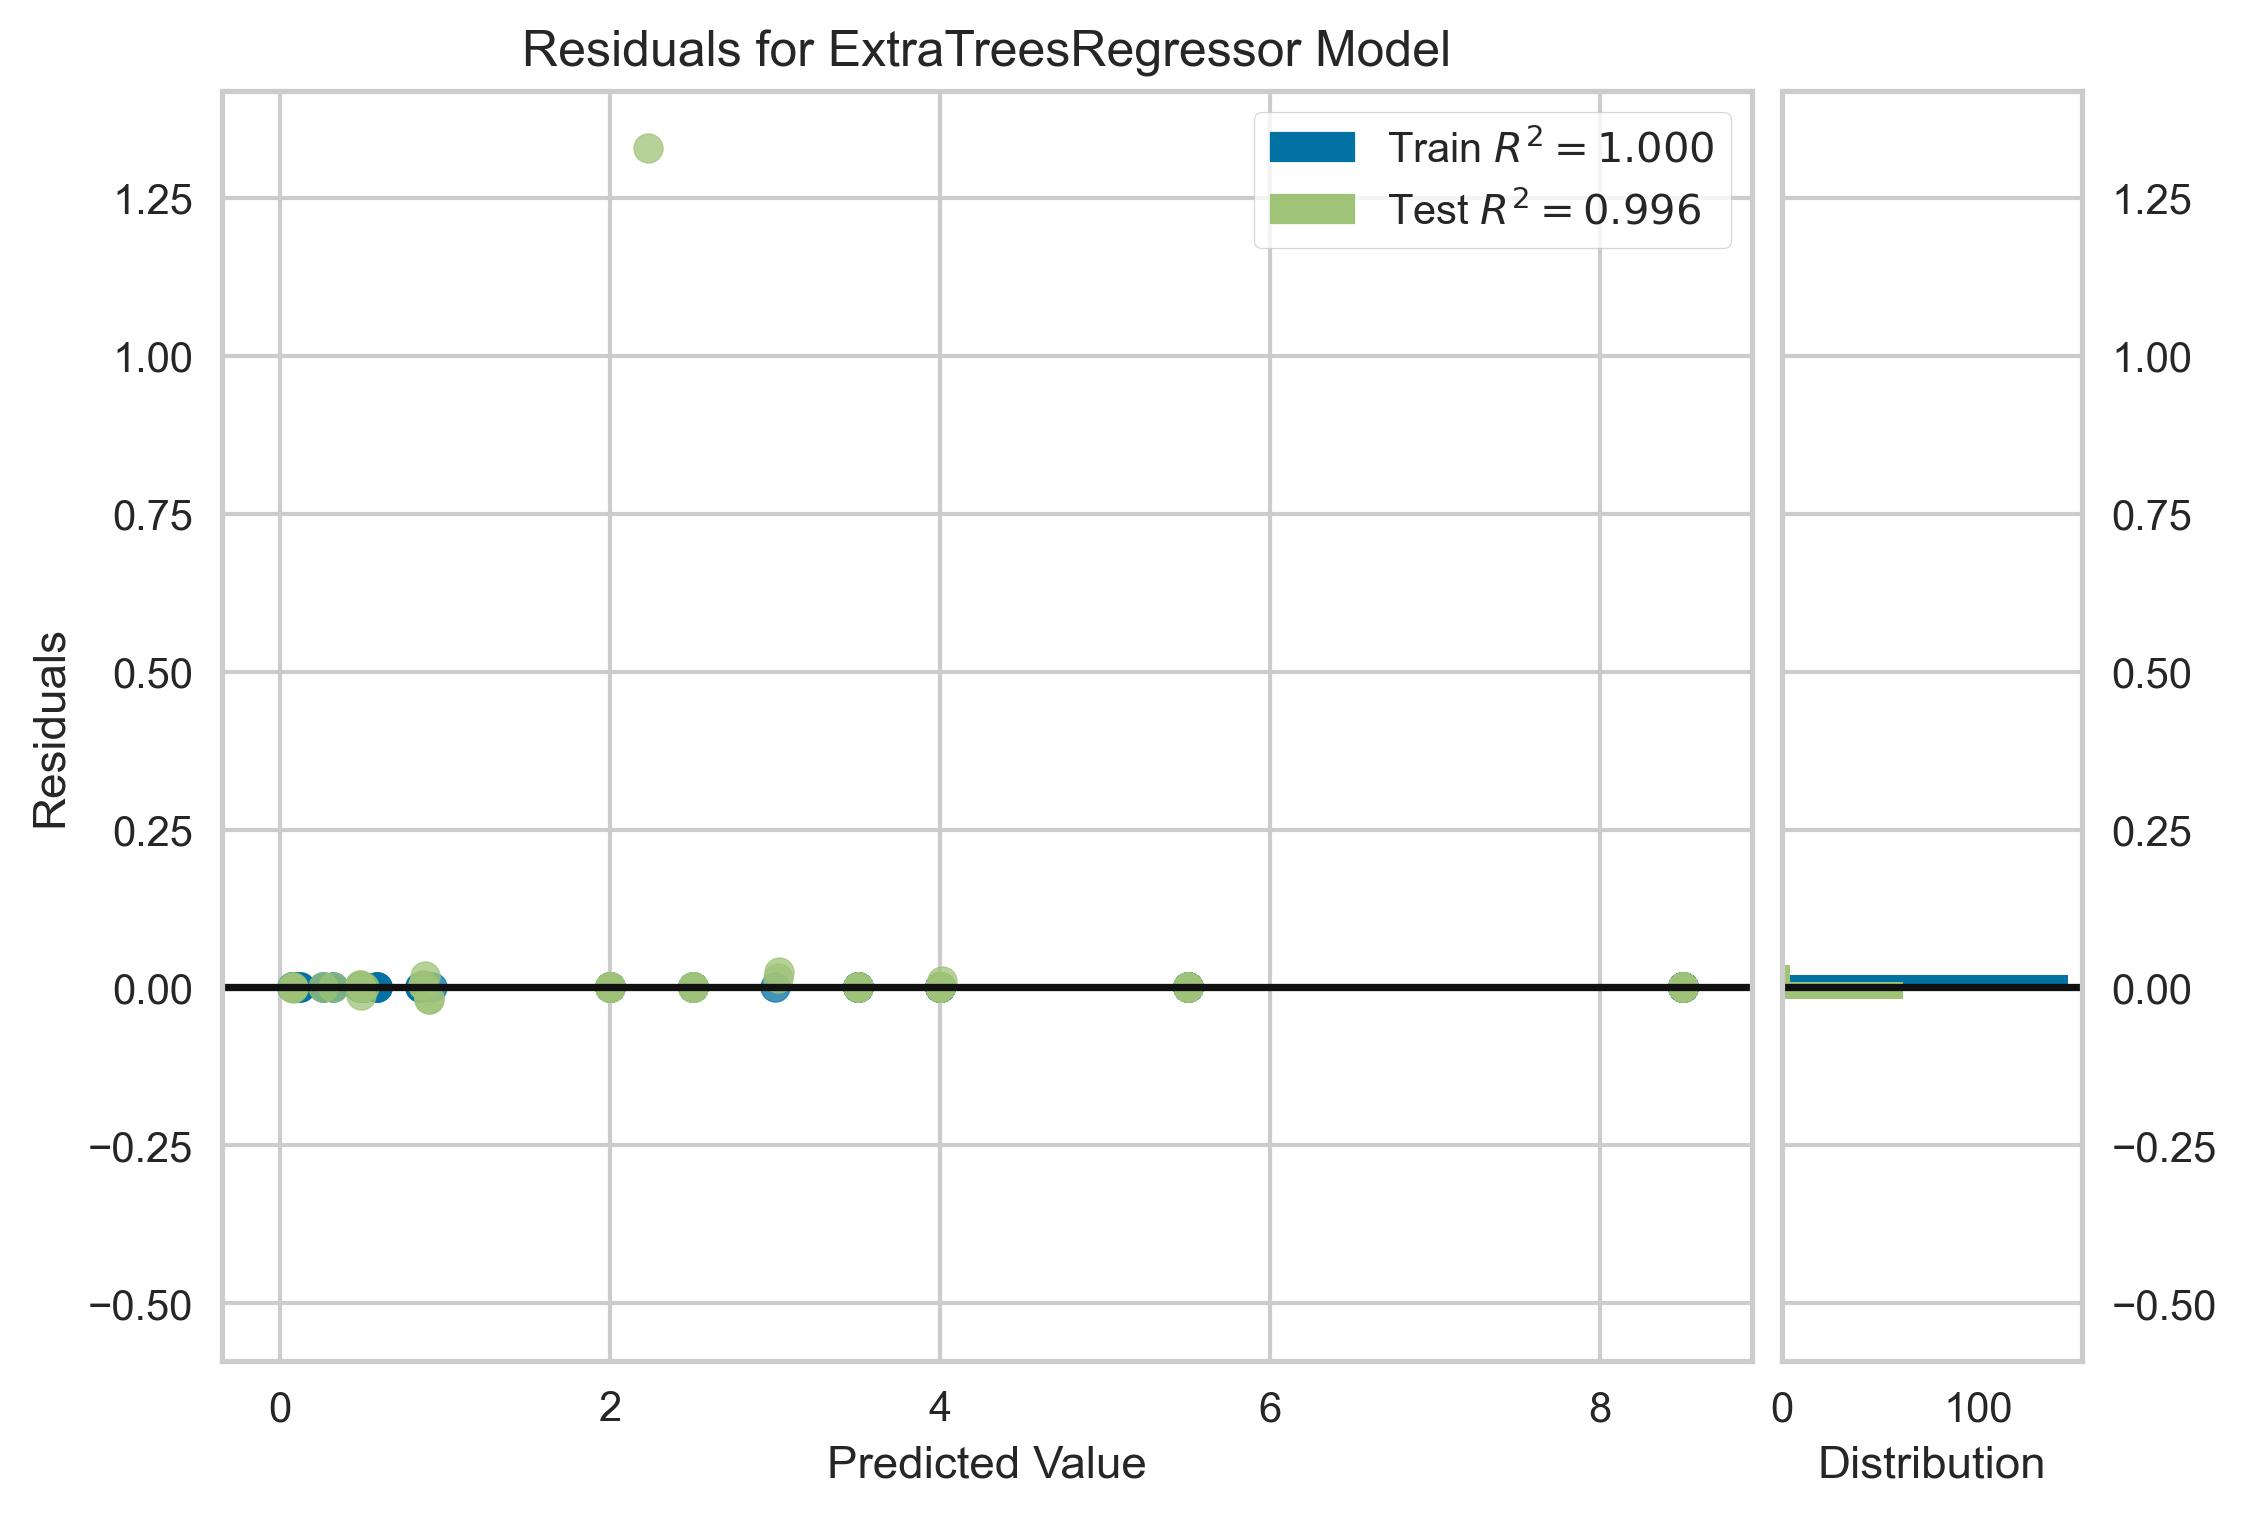

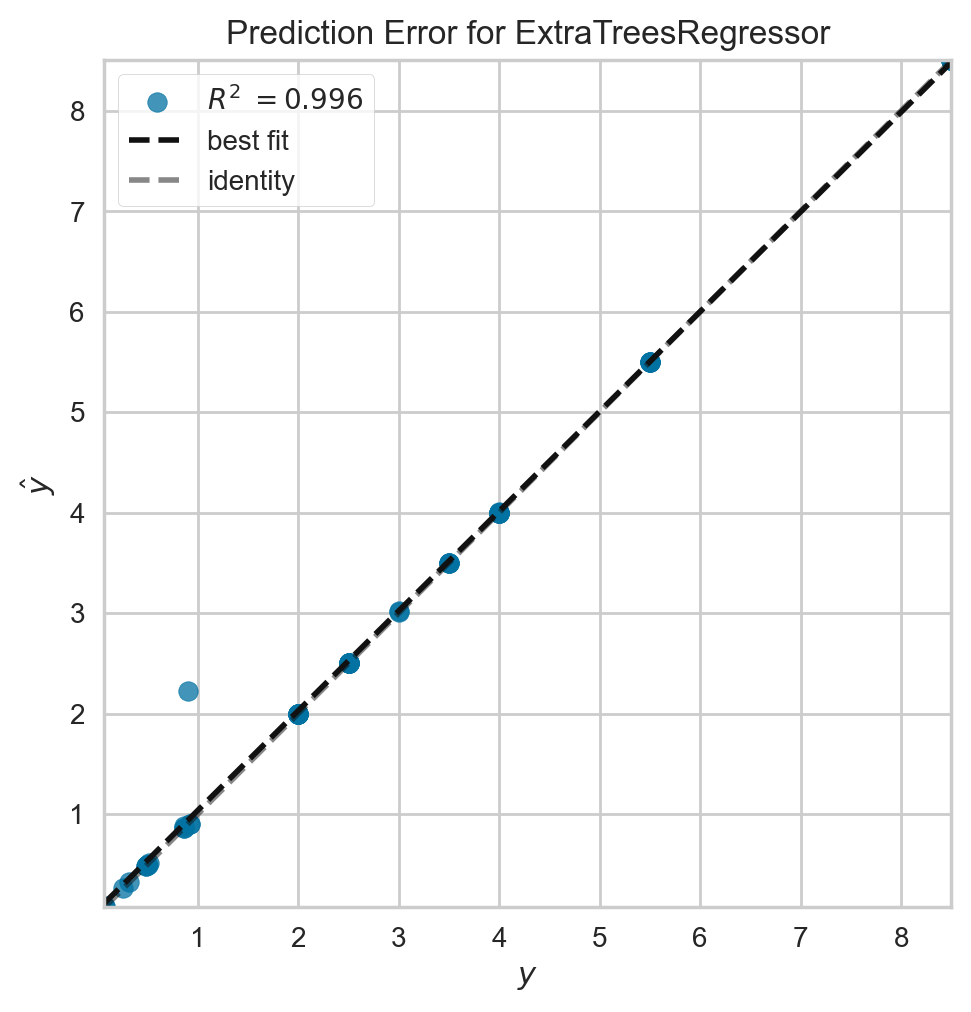

In [9]:
# Plotting prediction accuracy of GBR
plot_model(et,scale = 3)
plot_model(et, plot = 'error',scale = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1192,0.0197,0.1405,0.9953,0.0512,0.0685
1,0.1207,0.0274,0.1655,0.9967,0.0769,0.2159
2,0.0848,0.0151,0.1227,0.9985,0.0718,0.2749
3,0.1279,0.0264,0.1623,0.9968,0.0905,0.5440
4,0.0718,0.0095,0.0974,0.9990,0.0751,0.4308
5,0.1552,0.0388,0.1970,0.9956,0.1092,0.2470
6,0.1460,0.0340,0.1844,0.9961,0.1167,0.4861
7,0.0789,0.0102,0.1010,0.9973,0.0278,0.0399
8,0.0705,0.0099,0.0997,0.9986,0.0546,0.2178


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

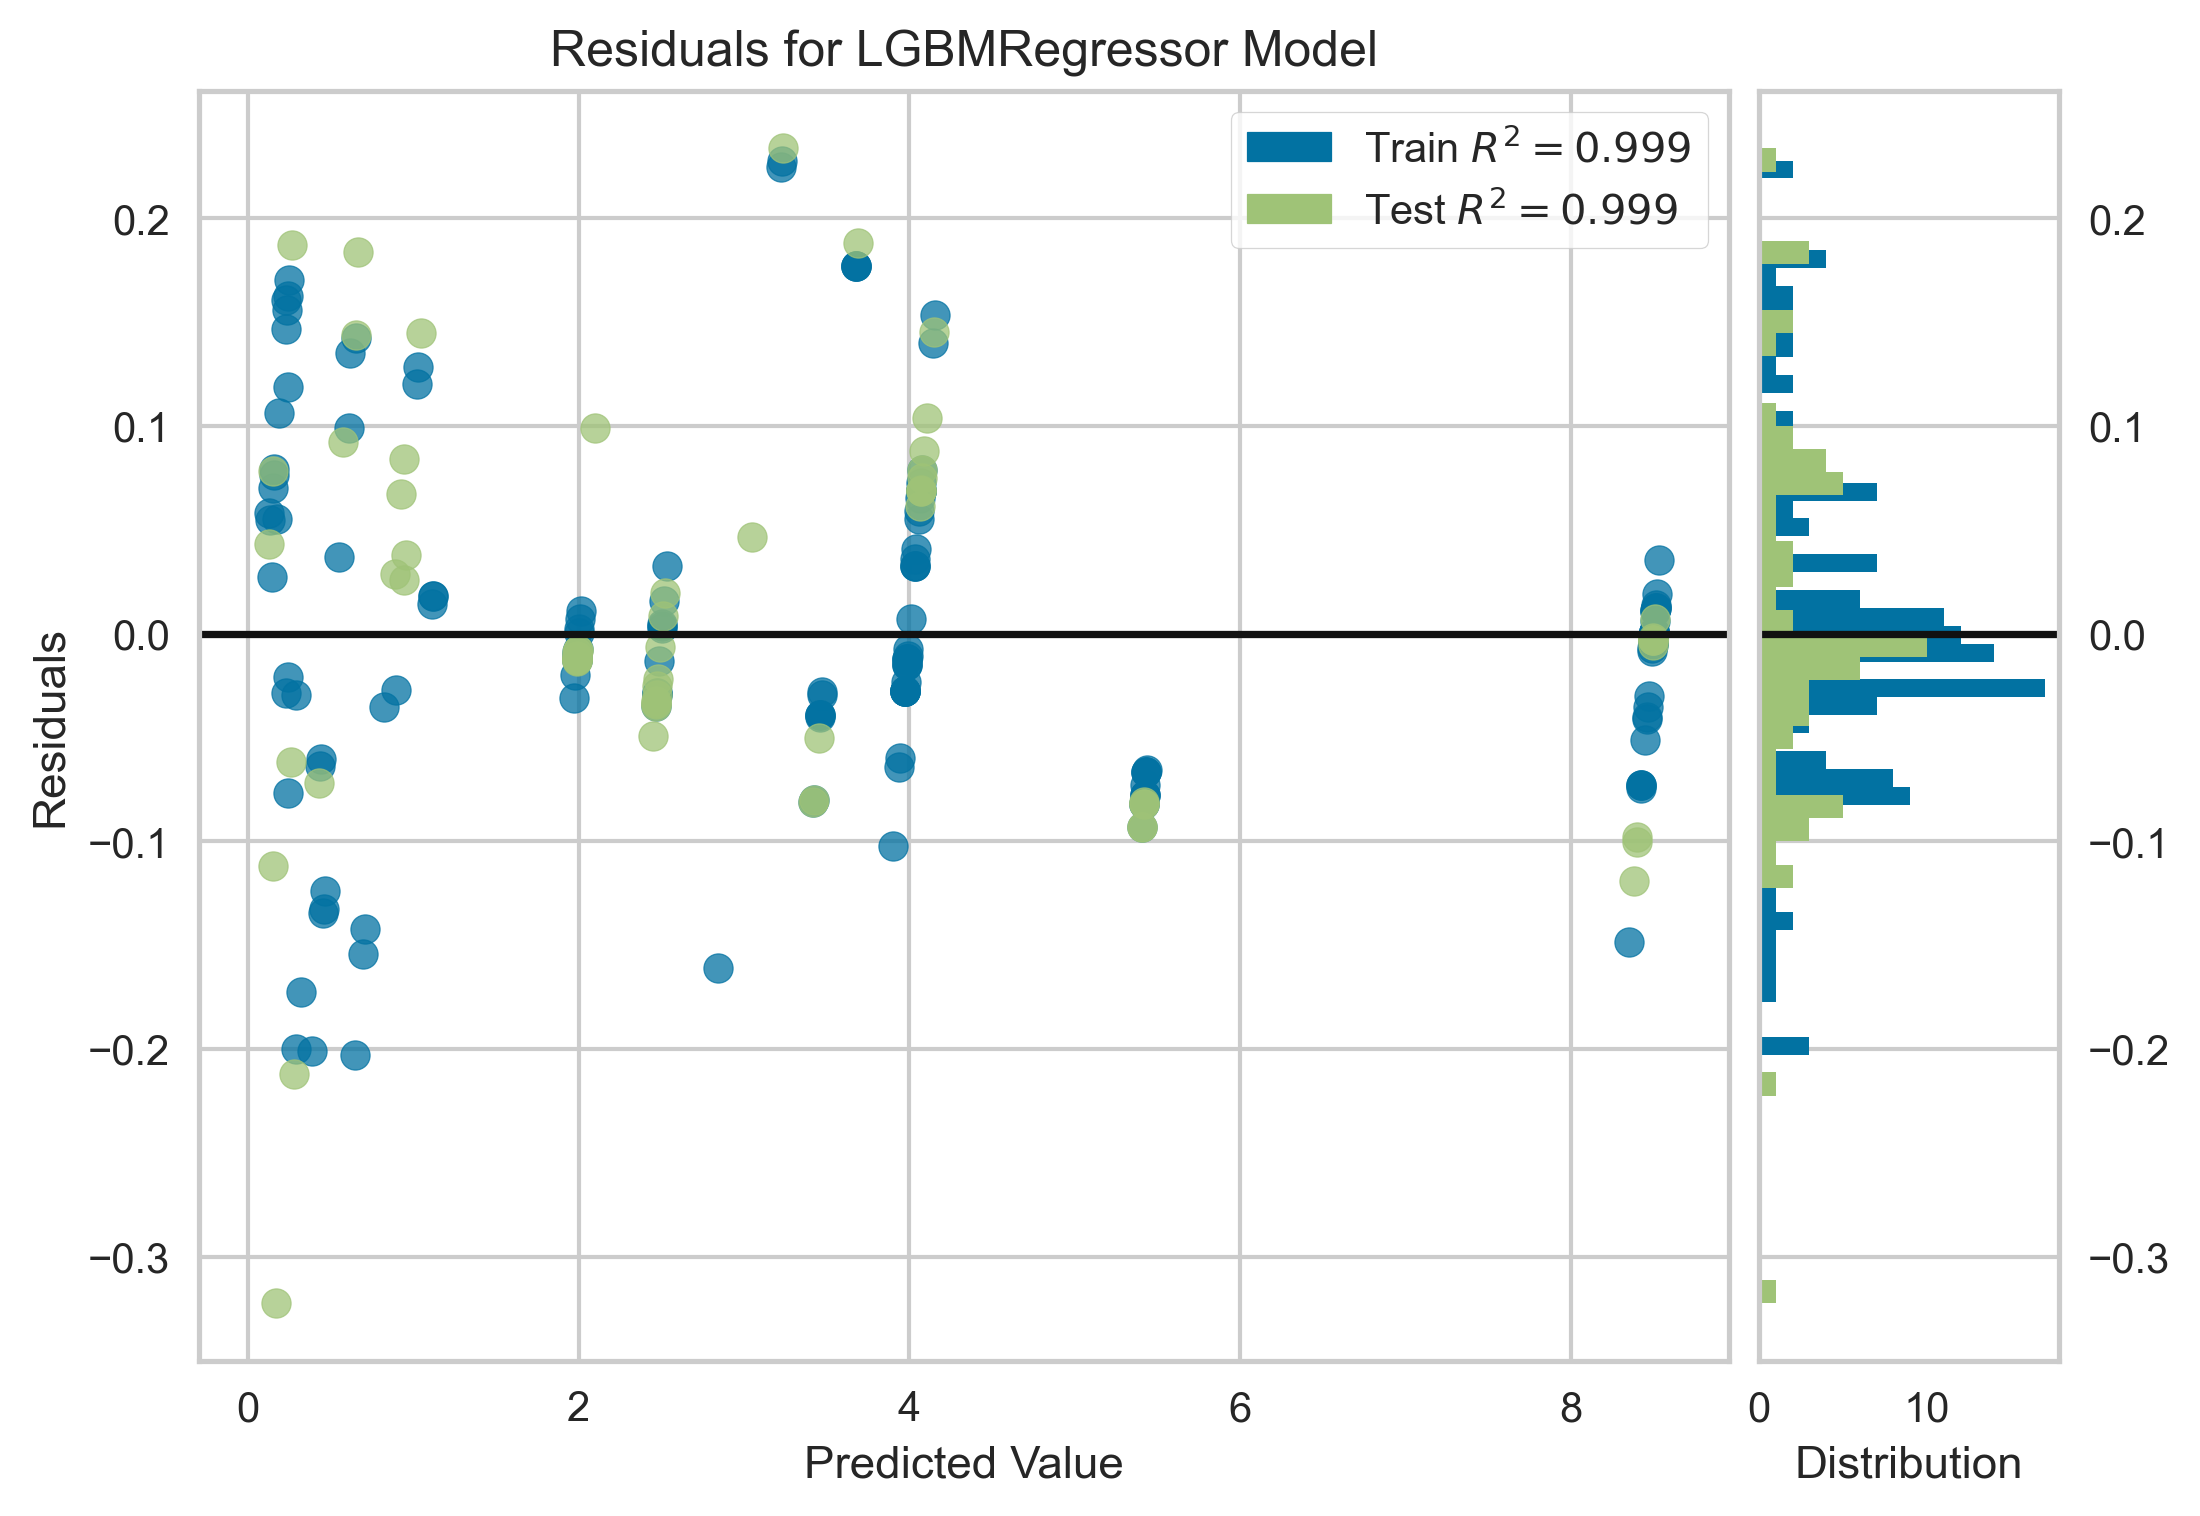

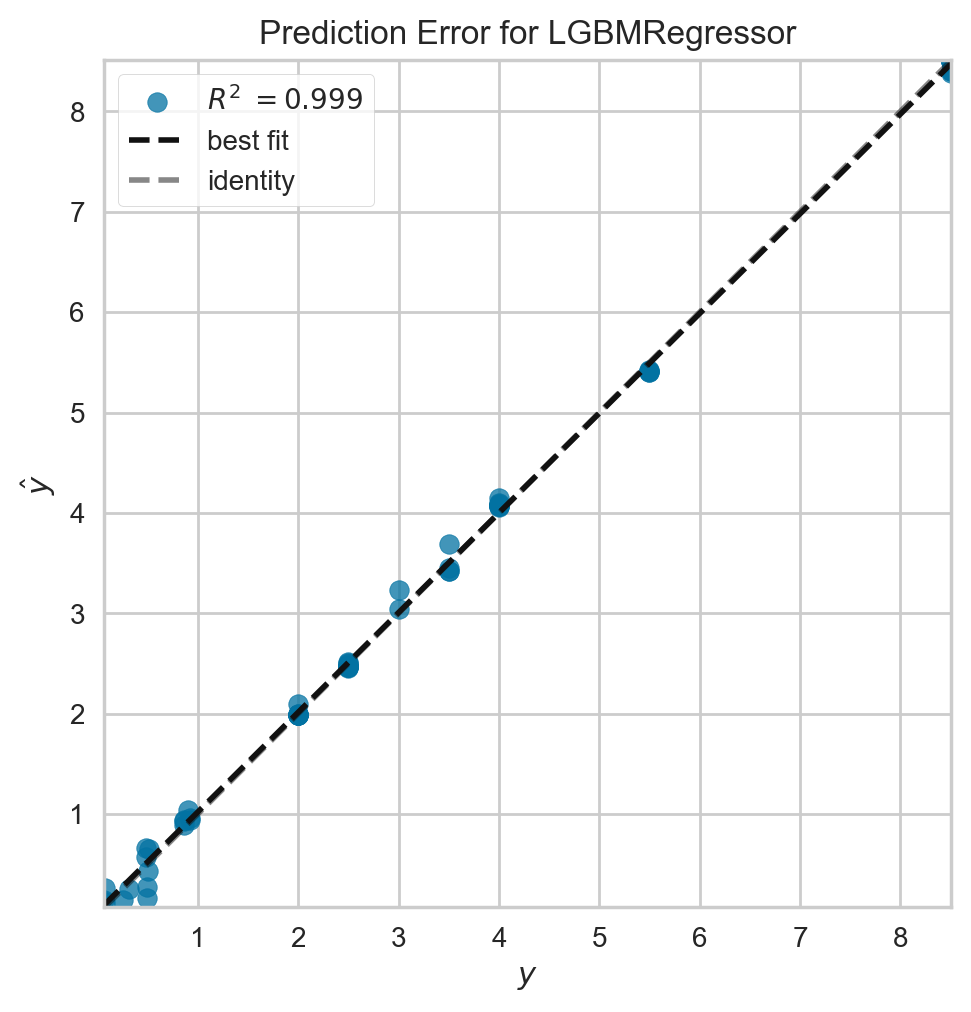

In [15]:
 # Creating the ML model based on best models compared above: Extra Trees Regressor
lightgbm=create_model('lightgbm')

# Plotting prediction accuracy of GBR
plot_model(lightgbm,scale = 3)
plot_model(lightgbm, plot = 'error',scale = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0603,0.0105,0.1027,0.9975,0.0504,0.0810
1,0.0561,0.0120,0.1095,0.9986,0.0404,0.0496
2,0.0590,0.0108,0.1040,0.9989,0.0688,0.2393
3,0.0781,0.0328,0.1812,0.9960,0.0780,0.1393
4,0.0397,0.0095,0.0973,0.9990,0.0443,0.1085
5,0.1070,0.0364,0.1909,0.9958,0.0662,0.1388
6,0.0372,0.0039,0.0623,0.9996,0.0168,0.0508
7,0.0577,0.0124,0.1113,0.9967,0.0493,0.0606
8,0.0568,0.0110,0.1050,0.9985,0.0152,0.0331


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

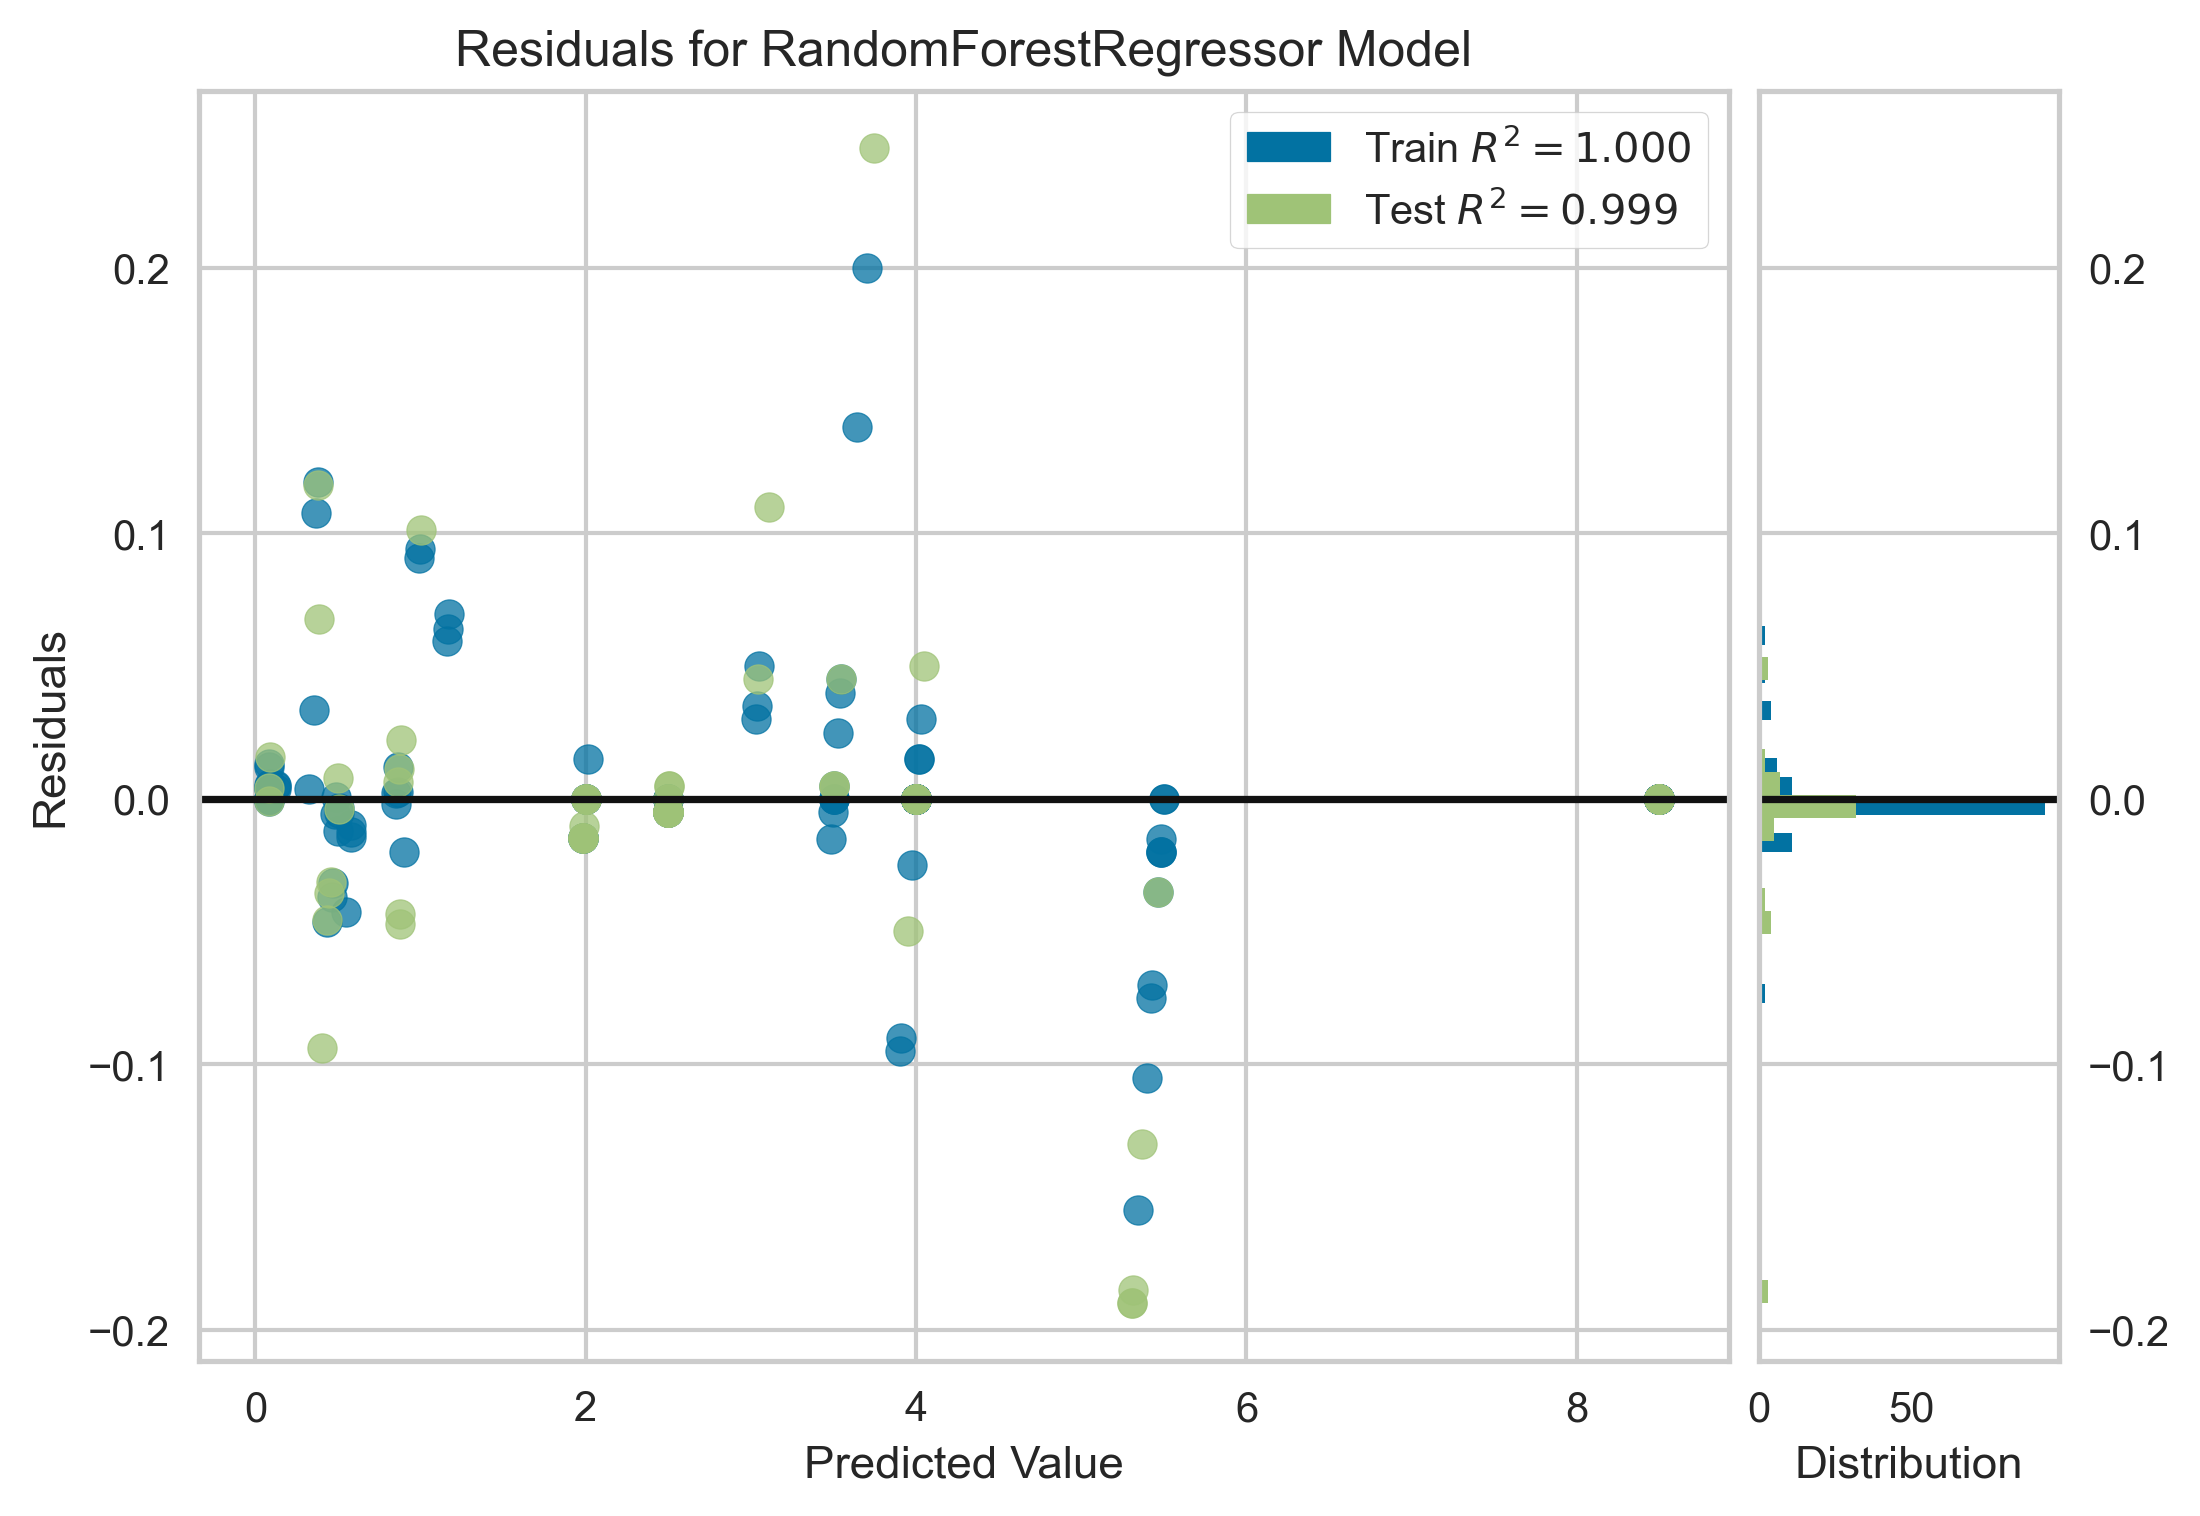

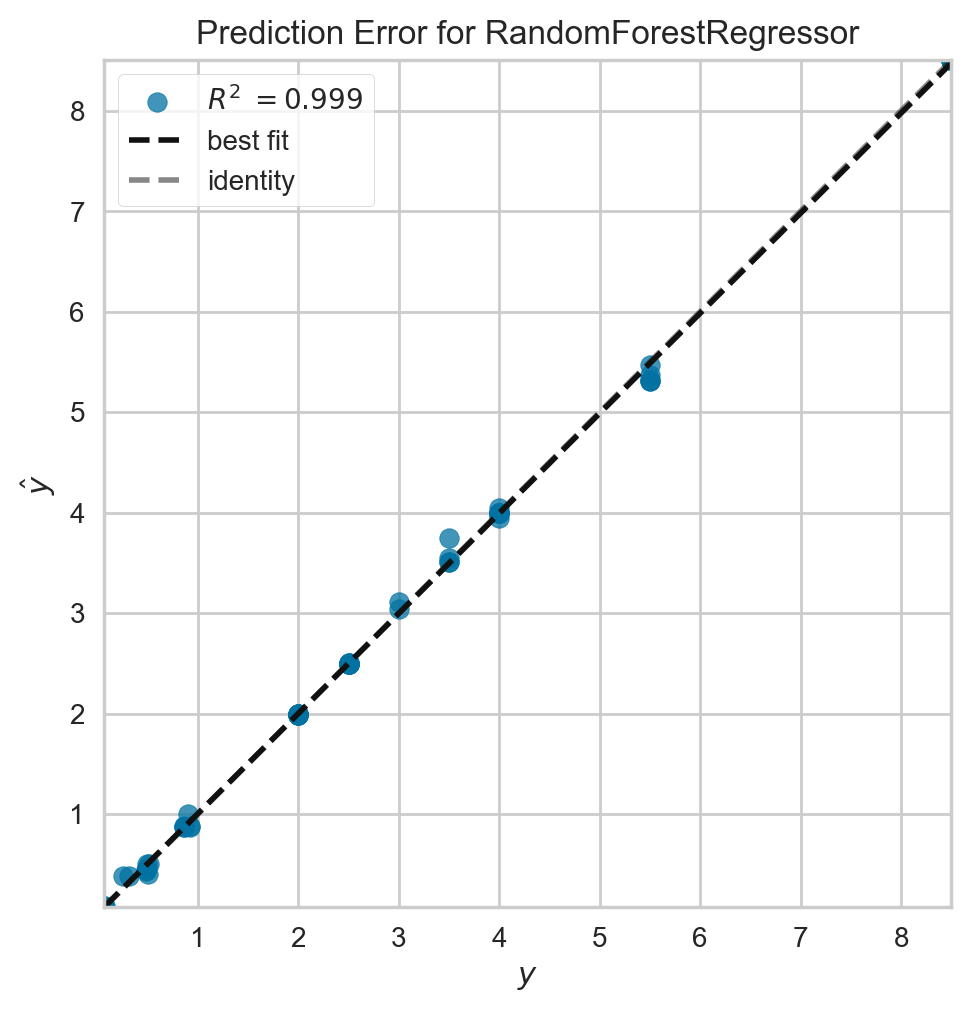

In [17]:
 # Creating the ML model based on best models compared above: Extra Trees Regressor
rf=create_model('rf')

# Plotting prediction accuracy of GBR
plot_model(rf,scale = 3)
plot_model(rf, plot = 'error',scale = 2)

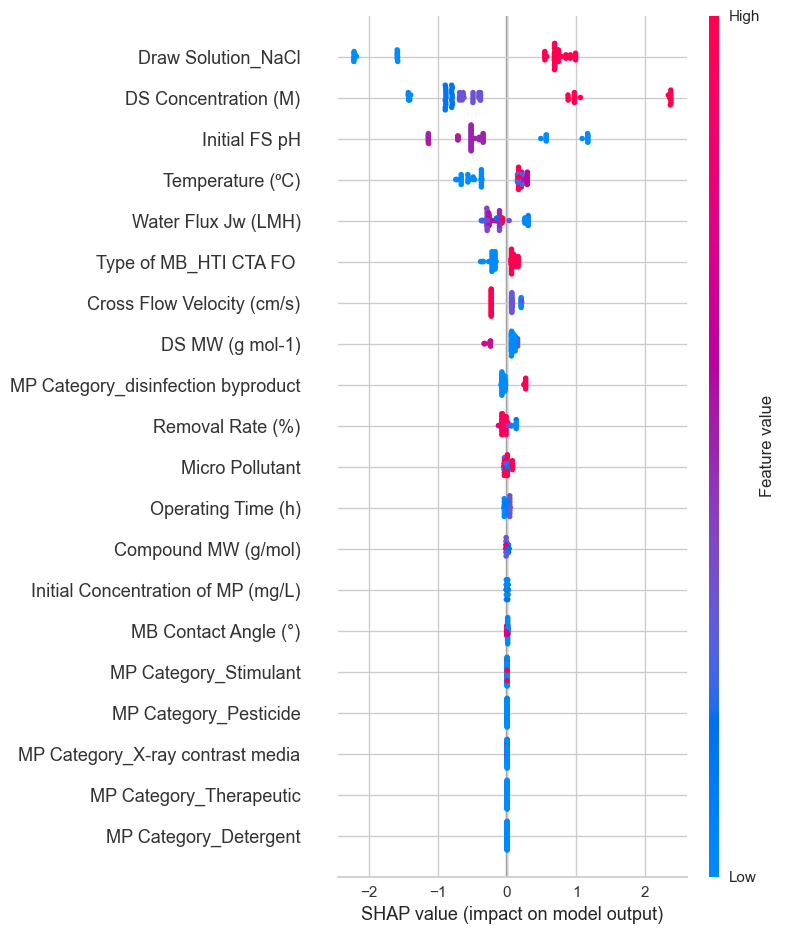

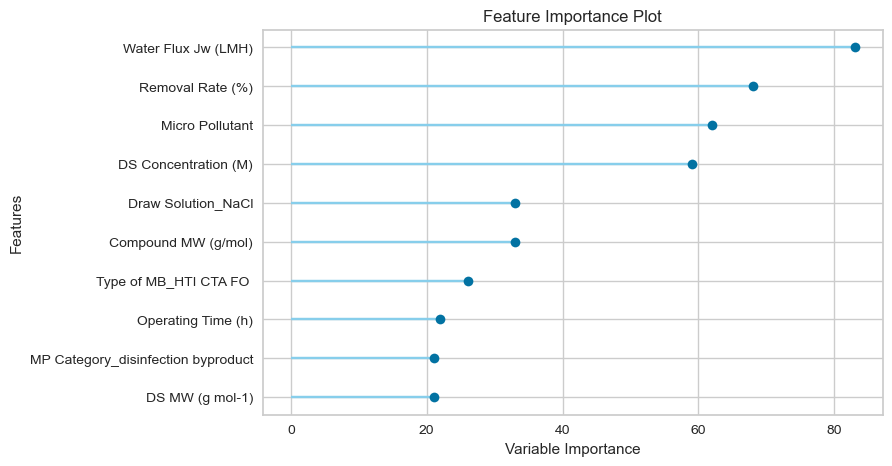

In [16]:
# Feature importance and SHAP plots

interpret_model(lightgbm)
plot_model(lightgbm, plot = 'feature')

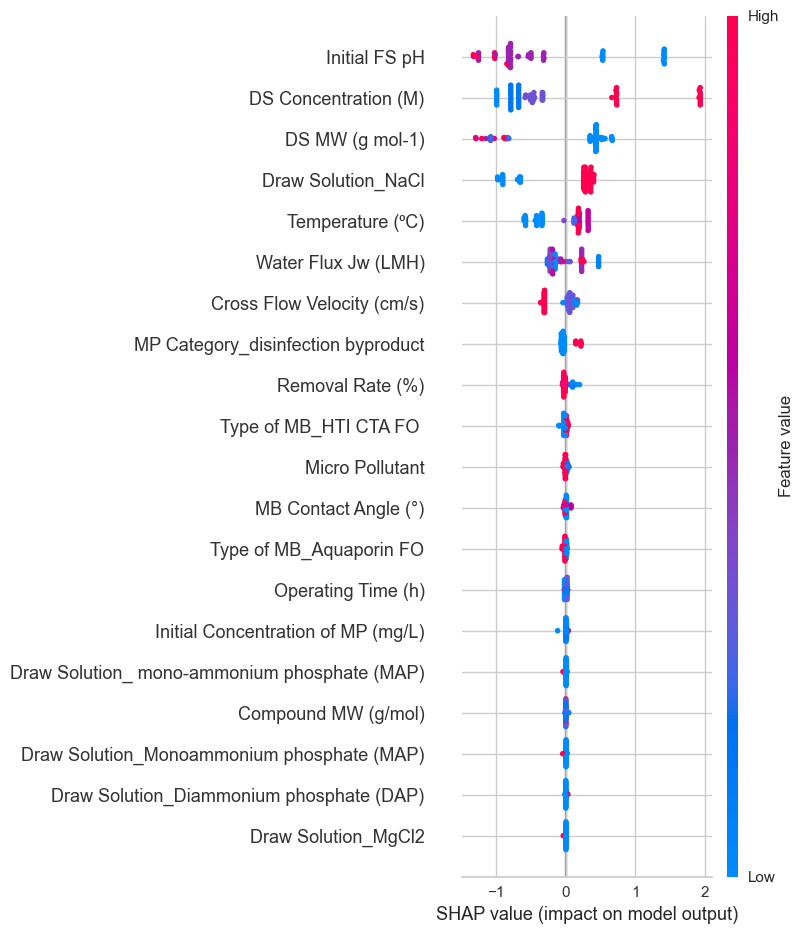

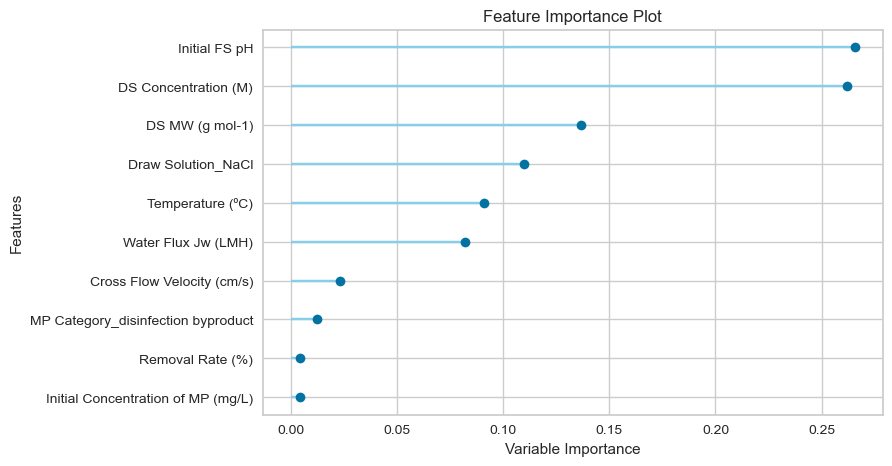

In [18]:
# Feature importance and SHAP plots

interpret_model(rf)
plot_model(rf, plot = 'feature')